In [3]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline


In [40]:
#All speed units will be in meters/sec

class Car:
    def __init__(self, car_id, size = 5, speed = 15, max_speed = 30, location = 0):
        self.car_id = car_id
        self.size = size
        self.max_speed = max_speed
        self.speed = abs(speed)
        self.location = location
            
        
    def move(self):
        self.location += self.speed 
        if self.location > 1000:
            self.location = self.location % 1000
        return self.location
    
    def check_loc(self):
        return("I'm car {} and I'm at {}, I'm going {} m/s".format(self.car_id, self.location, self.speed))
    
    


In [41]:
class Road:
    def __init__(self):
        self.cars = self.make_cars()
        self.road_map = np.array([0 for _ in range(1050)])
    
    def make_cars(self, num = 30):
        all_cars = []
        for x in range(num):
            all_cars.append(Car(car_id = x))
        return all_cars
    
    def place_cars_init(self):
        placement = 0
        for car in self.cars:
            car.location = placement
            placement += 33
    
    
    def update_road_map(self):
        self.road_map = np.array([0 for _ in range(1050)])
        for car in self.cars:
            for x in range(5):
                self.road_map[car.location+x] = 1
    
    def change_car_speed(self):
        for car in self.cars:
            space = []
            for x in self.road_map[(car.location+5):(car.location+5)+car.speed]:
                space.append(x)
            if random.random() <= .10:
                if car.speed > 0:
                    car.speed -= 2
            elif sum(space) == 0 and car.speed <= car.max_speed:
                car.speed += 2
            elif sum(space) > 1:
                if car.speed > 0:
                    car.speed = 0
    
    
    def drive(self):
        return [car.move() for car in self.cars]
    
    
    def check_cars(self):
        return [car.check_loc() for car in self.cars]
    
    
    def reset(self):
        self.road_map = [0 for _ in range(1050)]
        self.place_cars_init()
        self.update_road_map()

        

In [42]:
class Sim:
    def __init__(self):
        self.ticks = 0
        self.road = Road()

    
    
    def tick(self):
        road_data_sec = np.array(self.road.road_map)
        stats = {'location': self.road.check_cars()}
        self.road.change_car_speed()
        self.road.drive()
        self.road.update_road_map()
        return road_data_sec

        
    def reset(self):
        return self.ticks == 0
    
    
    def run(self, num_ticks = 500):
        all_data = []
        self.road.place_cars_init()
        for tick in range(num_ticks):
            all_data.append(self.tick())
            self.ticks += 1
            
        return np.array(all_data)
        

In [43]:
sim = Sim()
trial_data = sim.run()


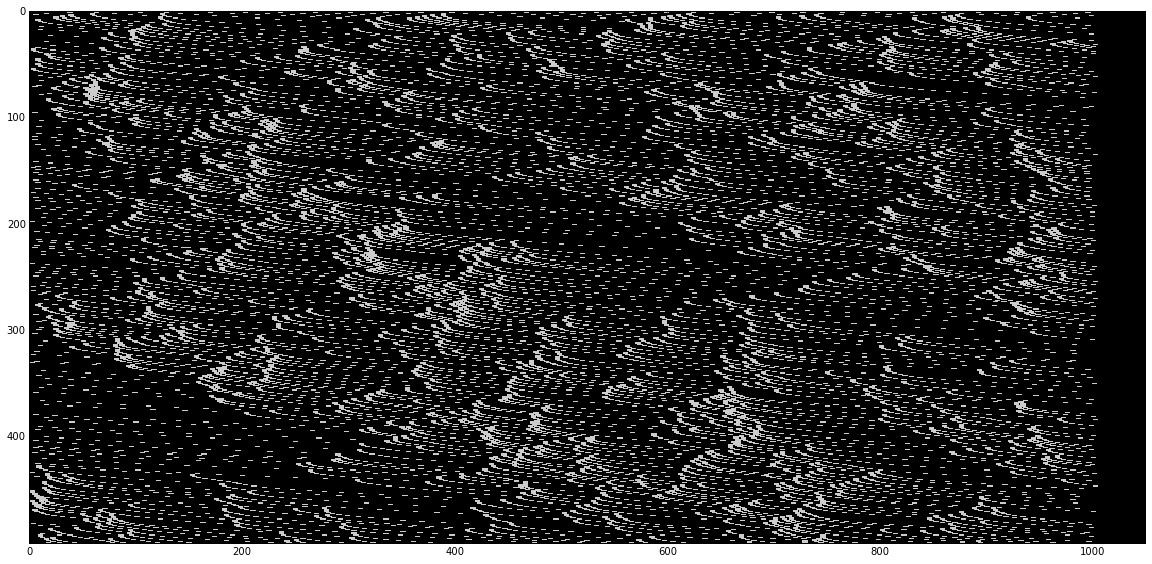

In [44]:
img_data = trial_data.astype('float32')
#print(img_data)

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='spectral', interpolation='nearest')